## **Project 4: Page View Time Series Visualizer (Project by freeCodeCamp)**

### **By Maryam Panjri**

### **Tasks**:
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date` column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.
- Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.
- Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at `Jan` and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

---

In [189]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [190]:
# Importing data 
df = pd.read_csv('fcc-forum-pageviews.csv')

In [191]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [192]:
df.tail()

,date,value
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144
1303,2019-12-03,158549


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [194]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [195]:
df.dtypes

date     object
value     int64
dtype: object

In [196]:
df.columns

Index(['date', 'value'], dtype='object')

In [197]:
df.size

2608

In [198]:
df.shape

(1304, 2)

---

In [199]:
# Parsing date (Converting the 'date' to datetime object)
df['date'] = pd.to_datetime(df['date'])

In [200]:
# Setting index column to 'date'
df.set_index('date', inplace = True)  

In [201]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### We can see that the index has been set to the 'date' column.

In [202]:
# Cleaning data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [203]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [204]:
df.size

1238

#### We can see the size of the dataFrame has been reduced to 1116 which earlier was 2608. Hence, we can say that the data is cleaned by filtering out the days.

#### **Line Plot**

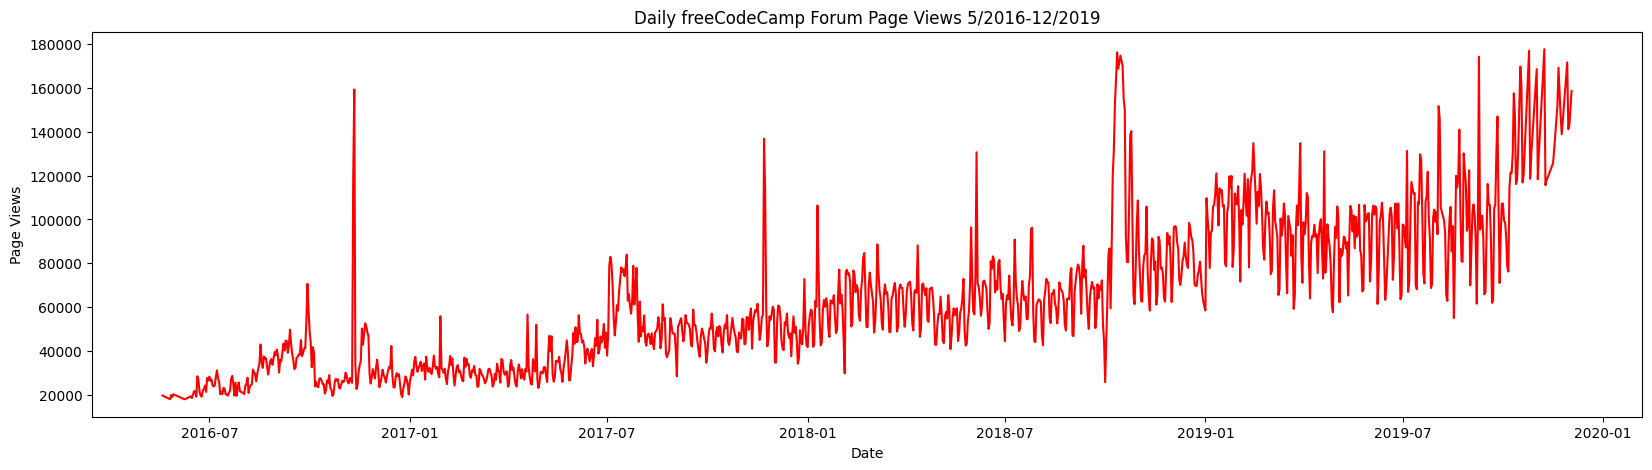

In [205]:
# Draw line plot
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(df.index, df['value'], c = 'r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views');

#### **Bar Plot**

In [206]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

In [207]:
df_bar.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [208]:
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()

In [209]:
# Convert multi-index to DataFrame
df_bar = df_bar.unstack()

In [210]:
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


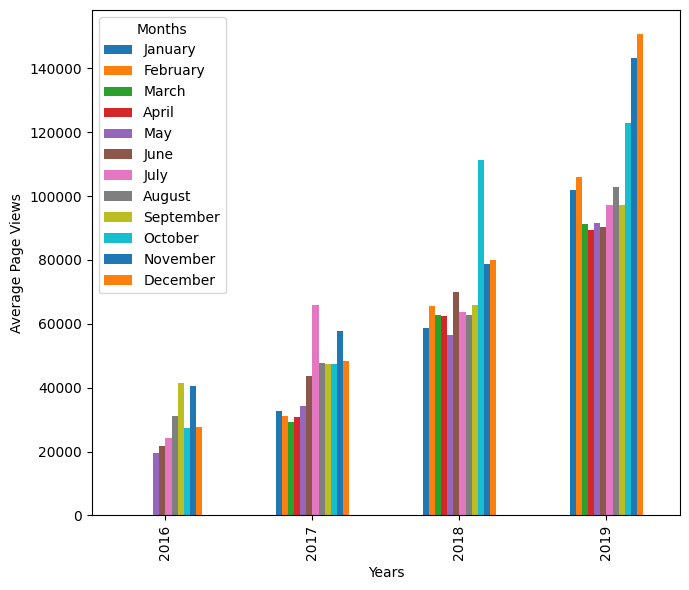

In [211]:
# Draw bar plot
months = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = df_bar.plot(kind = 'bar', figsize = (7,6))

plt.legend(months, title = 'Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.tight_layout()

fig = fig.figure

#### **Box Plot**

In [212]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['monum'] = df_box['date'].dt.month
df_box = df_box.sort_values('monum')

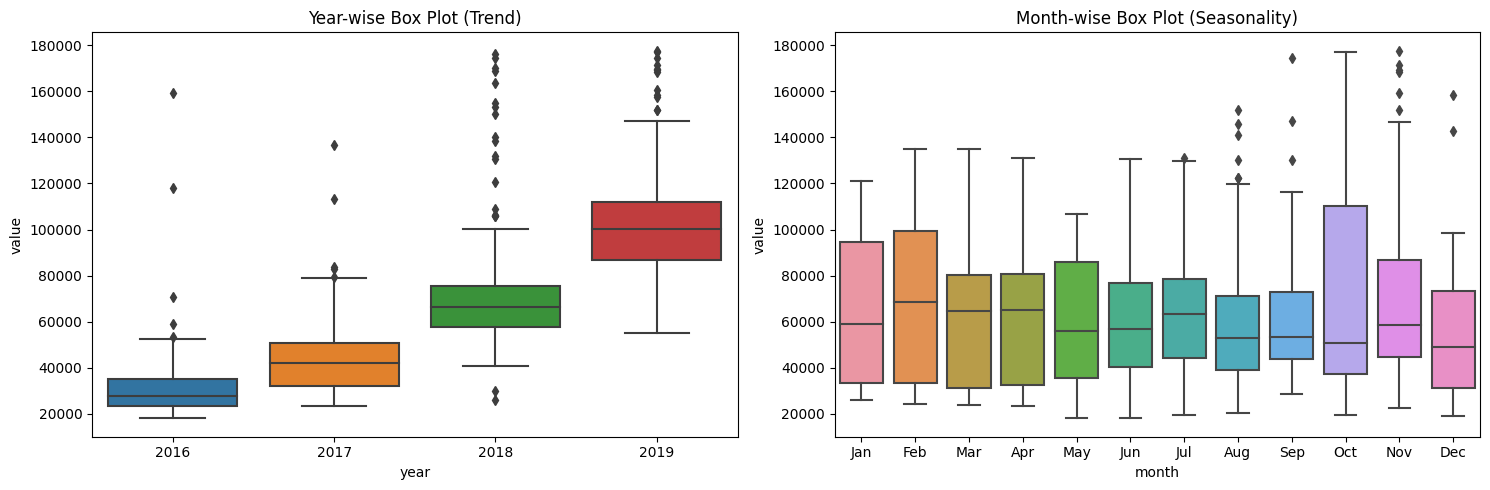

In [213]:
# Draw box plots (using Seaborn)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')
sns.boxplot(x = 'year', y = 'value', data = df_box, ax = ax[0])

ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')
sns.boxplot(x = 'month', y = 'value', data = df_box, ax = ax[1])

plt.tight_layout()

---